In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

C:\Users\HP\AppData\Local\Temp\ipykernel_14784\948956688.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
pip install mpl_toolkits.mplot3d

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits.mplot3d (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.mplot3d


In [12]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


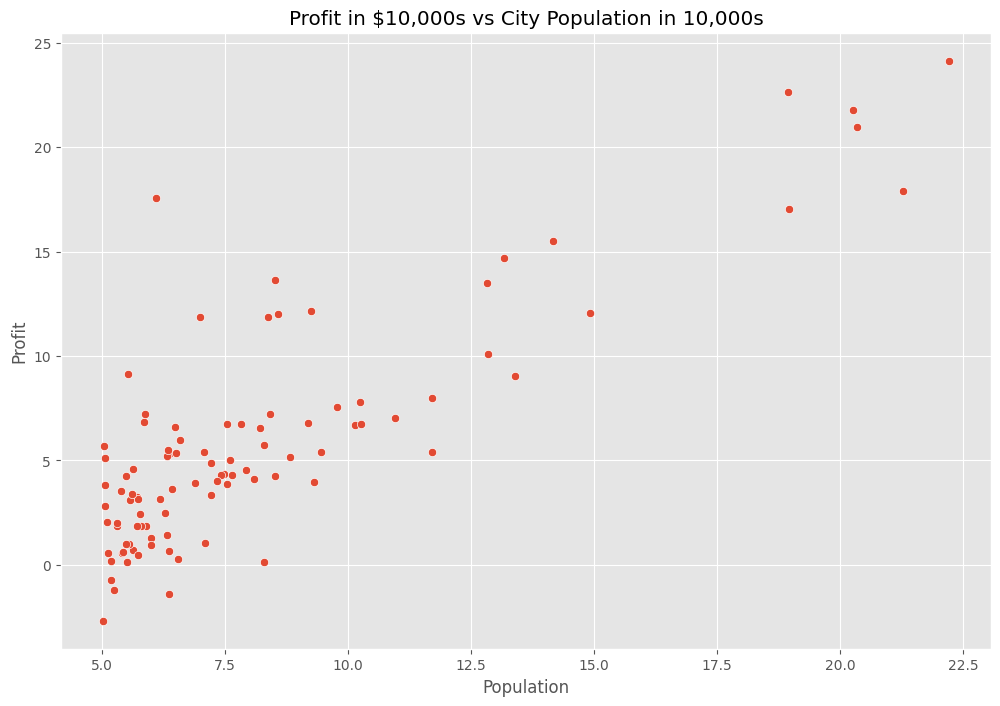

In [17]:
# visualising data
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Profit in $10,000s vs City Population in 10,000s");

### Compute the Cost $J(\theta)$

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [18]:
# Computing the Cost
def cost_function(x, y, theta):
    y_pred = x.dot(theta)
    m = len(y)
    error = (y_pred -y)**2

    return 1/(2*m) * np.sum(error)

In [19]:
m = data.Population.values.size
x = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(x, y, theta)

32.072733877455676

In [20]:
# checking the structure of theta
theta

array([[0.],
       [0.]])

### Gradient Descent


Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [21]:
# writing the gradient descent function
def gradient_descent (x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = y_pred - y
        error_g = np.dot(x.transpose(), error)
        theta -= alpha * 1/m * error_g
        costs.append(cost_function(x, y, theta))
    return theta, costs


In [22]:
# deploying the gradient descent to data

theta, costs = gradient_descent(x, y, theta, alpha = 0.01, iterations = 2000)

print("h(x) = {} + {}x".format(str(round(theta[0,0], 2)),
                              str(round(theta[1,0], 2))))

h(x) = -3.79 + 1.18x


In [23]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range (len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)

In [24]:
from mpl_toolkits.mplot3d import Axes3D

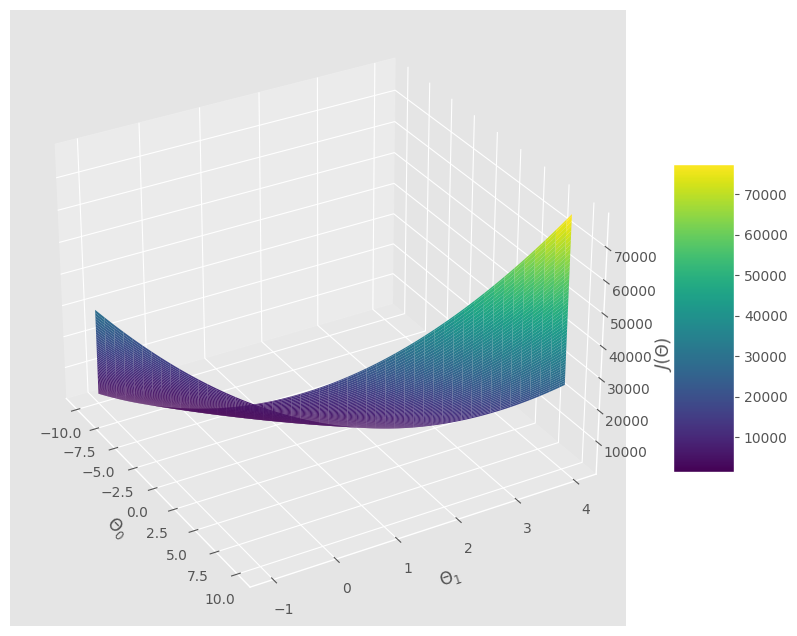

In [45]:
# visualising data in 3D

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection = "3d")

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis")
fig.colorbar(surf, shrink =0.5, aspect =5)

ax.set_xlabel(r"$\Theta_0$")
ax.set_ylabel(r"$\Theta_1$")
ax.set_zlabel(r"$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

### Plotting the Convergence

Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
C:\Users\HP\AppData\Local\Temp\ipykernel_14784\2234950917.py:4: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Values of the Cost Functions over Iterations of Gradient Descent')

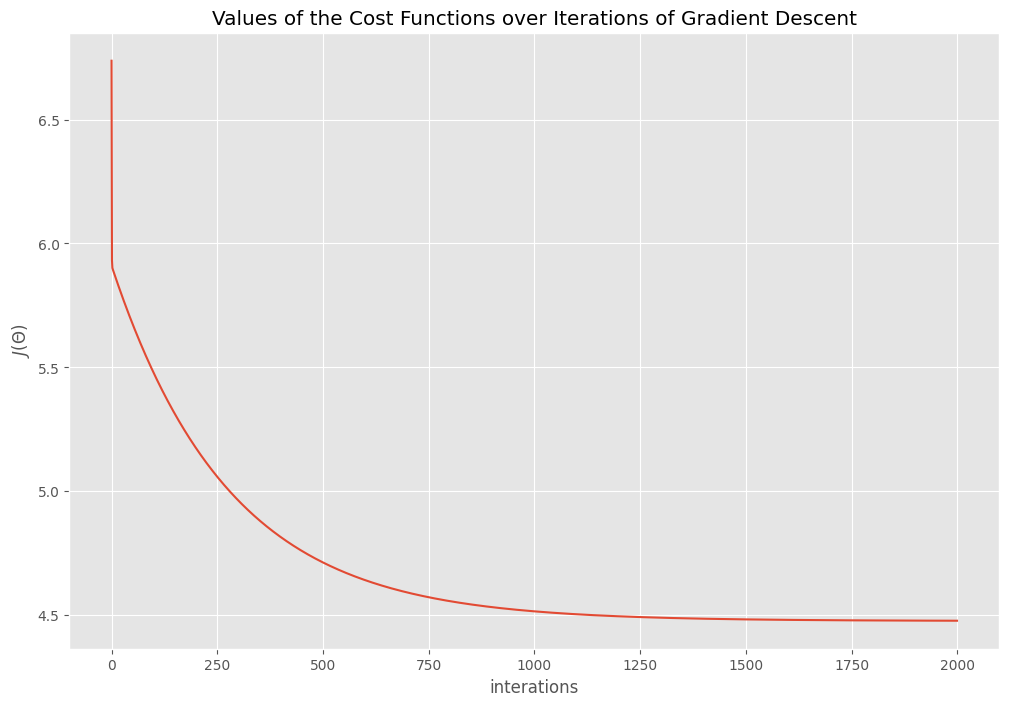

In [26]:
# plotting the convergence
plt.plot(costs)
plt.xlabel("interations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Functions over Iterations of Gradient Descent")

In [27]:
theta.shape

(2, 1)

In [28]:
theta


array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear Regression Fit')

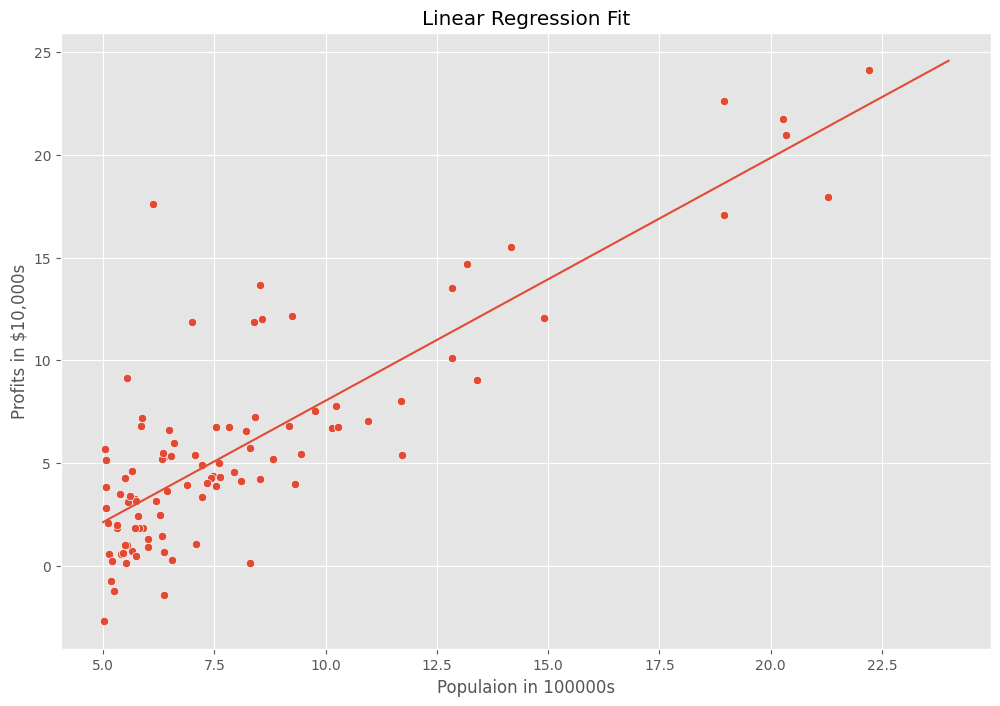

In [38]:
# training the data with linear regression fit
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x = x_value, y = y_value)

plt.xlabel("Populaion in 100000s")
plt.ylabel("Profits in $10,000s")
plt.title("Linear Regression Fit")

### Inference using the optimized $\theta$ values

$h_\theta(x) = \theta^Tx$

def predict (x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [39]:
def predict (x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [40]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40, 0000 people, the model predicts a profit of $" + str(round(y_pred_1)))

For a population of 40, 0000 people, the model predicts a profit of $9408


In [41]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population 83,000 people, the model predicts a profit of $" + str(round(y_pred_2)))

For a population 83,000 people, the model predicts a profit of $60243
